# Final Project
Syracuse Applied Data Science, IST-718 Big Data Analytics  

Team: AUQ-42
Team Members:
* Ryan Timbrook
* Amanda Carvalho
* Luigi Penaloza
* Chikeung Cheung

DATE:   
ASSIGNMENT: IEEE-CIS Fraud Detection (kaggle competition)


## Business Question
Improve the efficacy of fraudulent transaction alerts, helping hundreds of thousands of businesses reduce their fraud loss and increase their revenue; while securing consumer’s peace of mind and wallets!





## Problems to solve
Identify real-time fraudulent e-commerce transactions, using advanced Machine Learning algorithms, by automating alerts that block highly suspicious activities. 

## Why the problem is important
Everyone who uses e-commerce technology and modern banking systems are at risk of being a victim of fraud. It costs both the individual as well as the merchant who offers refunds for fraudulent transactions; and not all scenarios are covered, leaving many individuals having to pay.  

Chargebacks area a growing costly burden for merchants. By eliminating chargebacks, fines, and fees related to third-party fraud and unauthorized charges, the client, VESTA , is able to significantly reduce the operational costs and resources associated with complex chargeback management solutions and the specialized staff necessary for rapid, scalable business growth. This leaves all the cost risk on the client. Improving automated fraudulent detection technology will greatly reduce this cost.  
 

# About the Data
The core data set for this project is provided by VESTA, the worlds leading payment service company, and is a kaggle competition being facilitated by the [IEEE Computational Intelligence Society](https://www.kaggle.com/c/ieee-fraud-detection/data).

## [VESTA](https://www.kaggle.com/c/ieee-fraud-detection/data)
Predicting the probability that an online transaction is fraudulent, as denoted by the binary target isFraud.  

The data is broken into two files identity and transaction, which are joined by **TransactionID**. *Not all transactions have corresponding identity information.*

#### Categorical Features - Transaction
* ProductCD
* card1 - card6
* addr1, addr2
* P_emaildomain
* R_emaildomain
* M1 - M9

#### Categorical Features - Identity
* DeviceType
* DeviceInfo
* id_12 - id_38

*The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).*

##### Files
* train_{transaction, identity}.csv - the training set
* test_{transaction, identity}.csv - the test set (you must predict the isFraud value for these observations)
* sample_submission.csv - a sample submission file in the correct format

## CCFD (kaggel)



## FTC

## Findings / Recommendations
place findings and recommendations here  





### --------------------------------------------------------------------------------------------
## Coding Environment Setup

# ONLY RUN WHEN WORKING ON COLAB

In [0]:
# toggle for working with colab
isColab = False

In [0]:
# mount google drive for working in colab
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# working within colab, set base working directory
base_dir = "./gdrive/My Drive/IST718_PRJ_FraudDetection/workspace/"

# validate directory mapping
#ls f'{base_dir}'

# upload custome python files
from google.colab import files
uploaded_files = files.upload()

# print files uploaded
for f in uploaded_files.keys():
  print(f'file name: {f}')

isColab = True

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Saving auq_42_utils.py to auq_42_utils.py
file name: auq_42_utils.py


In [0]:
# import packages for analysis and modeling
import pandas as pd #data frame operations
import numpy as np #arrays and math functions

import matplotlib.pyplot as plt #2D plotting
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 10.5, 7
import seaborn as sns #
from IPython.display import SVG
from itertools import groupby
from scipy.stats import uniform

# sklearn measurement evaluation packages
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, make_scorer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
import imblearn
from imblearn.under_sampling import RandomUnderSampler

# keras Deep Learning packages
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

import warnings
warnings.filterwarnings('ignore')

import logging
logging.getLogger('tensorflow').disabled = True

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [0]:
# import custome packages
import auq_42_utils as auq

All the files are downloaded


In [0]:
# set global properties
if not isColab:
    dataDir = './data/'
    outputDir = './output/'
    configDir = './config/'
    logOutDir = './logs/'
    imageDir = './images/'
    modelDir = './models/'
else:
    # working within colab
    dataDir = f'{base_dir}/data/'
    outputDir = f'{base_dir}/output/'
    configDir = f'{base_dir}/config/'
    logOutDir = f'{base_dir}/logs/'
    imageDir = f'{base_dir}/images/'
    modelDir = f'{base_dir}/models/'

modelPerformance = {}
modelName = 'base_nn'
appName = 'rt_fraud_base_nn'
loglevel = 10 # 10-DEBUG, 20-INFO, 30-WARNING, 40-ERROR, 50-CRITICAL

# transformed data sets
trainFileName = 'core_fraud_train.pkl'
testFileName = 'core_fraud_test.pkl'

In [0]:
# get a logger for troubleshooting / data exploration
logger = auq.getFileLogger(logOutDir,appName,level=loglevel)

In [0]:
np.random.seed(42) # NumPy
#random.seed(42) # Python
#tf.set_random_seed(42) # Tensorflow

## OBTAIN the data
Import external datasets for evaluation

### Vesta Dataset
#### IEEE-CIS Fraud Detection
##### Can you detect fraud from customer transactions?
* kaggle [link](https://www.kaggle.com/c/ieee-fraud-detection/data)

## FTC Dataset

### Credit Card Fraud Detection
#### Anonymized credit card transactions labeled as fraudulent or genuine
* Kaggel [Link](https://kaggle.com/mlg-ulb/creditcardfraud)

In [0]:
# read in datasets
import pickle
# look for reduced memory dataset first
isMemoryReductionTrain = False
isMemoryReductionTest = False

# training datasets
try:
    with open(f'{dataDir}{trainFileName}','rb') as f:
        train = pickle.load(f)
        logger.info(f'saved pickled vesta train dataset found...')
        isMemoryReductionTrain = True
except FileNotFoundError:
    logger.info('{trainFileName} file not found... pulling data in from csv files')
    # VESTA
    train_identity = pd.read_csv(f'{dataDir}ieee_train_identity.csv')
    train_transaction = pd.read_csv(f'{dataDir}ieee_train_transaction.csv')
    # merge VESTA training datasets
    train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left') 
    # free up memory of loaded datasets after merging
    train_identity = None
    train_transaction = None
    del train_identity, train_transaction

# testing datasets
try:
    with open(f'{dataDir}{testFileName}','rb') as f:
        test = pickle.load(f)
        logger.info(f'saved pickled vesta testing dataset found...')
        isMemoryReductionTest = True
except FileNotFoundError:
    logger.info('test file not found... pulling data in from csv files')
    test_identity = pd.read_csv(f'{dataDir}ieee_test_identity.csv')
    test_transaction = pd.read_csv(f'{dataDir}ieee_test_transaction.csv')
    # merge test datasets
    test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')
    # free up memory of loaded datasets after merging
    test_identity = None
    test_transaction = None
    del test_identity, test_transaction

saved pickled vesta train dataset found...
saved pickled vesta testing dataset found...


In [0]:
# look at the datasets shaped
logger.info(f'Vesta Train dataset shape: [{train.shape}]')
logger.info(f'Vesta Test dataset shape: [{test.shape}]')
logger.info(f'Vesta Train dataset Total NAN count: [{auq.getNaNCount(train)[0]}]')
logger.info(f'Vesta Test dataset Total NAN count: [{auq.getNaNCount(test)[0]}]')

Vesta Train dataset shape: [(590540, 65)]
Vesta Test dataset shape: [(506691, 64)]
Vesta Train dataset Total NAN count: [0]
Vesta Test dataset Total NAN count: [0]


In [0]:
# which columns have NaN fields, and how many are there
logger.info(f'Vesta Train dataset column NANs {auq.getColumnsNaNCnts(train, logger)}')

Vesta Train dataset column NANs 0


### SCRUB / CLEAN
Clean and perform initial transformations steps of the data

**Completed in notebook '_fraud_obtain_data'**...   

In [0]:
# run memory reduction steps - dataset is 11 GB when first loaded
logger.info(f'Memory Usage: VESTA Training Dataset:[{auq.mem_usage(train)}]')
logger.info(f'Memory Usage: VESTA Testing Dataset: [{auq.mem_usage(test)}]')

Memory Usage: VESTA Training Dataset:[70.71 MB]
Memory Usage: VESTA Testing Dataset: [60.28 MB]


### EXPLORE
Explore the datasets

**Completed in notebook _fraud_explore**   

In [0]:
# perform exploratory data analysis techiques
logger.info(train.columns)
print('')
logger.info(test.columns)

drop_cols = ['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
       'id_09', 'id_10', 'id_11','P_emaildomain', 'R_emaildomain','D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13',
       'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
train = train.drop(columns=drop_cols)
test = test.drop(columns=drop_cols)


Index(['TransactionID', 'isFraud', 'TransactionAmt', 'ProductCD', 'card1',
       'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
       'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2',
       'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13',
       'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
       'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
       'id_09', 'id_10', 'id_11'],
      dtype='object')
Index(['TransactionID', 'TransactionAmt', 'ProductCD', 'card1', 'card2',
       'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2',
       'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3',
       'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14',
       'D15', '

For categorical features we will apply OneHot transformation, but only for most common values for each feature to reduce sparsity. <br>
Also there is an embedding approach for categorical features transformation. It was implemented in this kernel https://www.kaggle.com/ryches/keras-nn-starter-w-time-series-split <br>
With embedding approach I didn't get any significant improvement comparing to this.

In [0]:
categorical_features = []
continuous_features = []
for c in train.columns:
    if str(train[c].dtype) == 'category':
        categorical_features.append(c)
    else:
        if not (c == 'isFraud' or c == 'TransactionID'):
            continuous_features.append(c)

In [0]:
#continuous_features

In [0]:
# hold out test data
X = train.drop(columns=['TransactionID', 'isFraud'])
y = train['isFraud']

# split the data 1 of 2
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

logger.info(f'X shape: {X.shape}')
logger.info(f'y shape: {y.shape}')
logger.info(f'X_test shape: {X_test.shape}')
logger.info(f'y_test shape: {y_test.shape}')

X shape: (472432, 28)
y shape: (472432,)
X_test shape: (118108, 28)
y_test shape: (118108,)


In [0]:
# hold out test data for prediction validation
#train['runiform'] = uniform.rvs(loc=0, scale=1, size=len(train))
#X_train = train[train['runiform'] >= 0.2]
#X_test = train[train['runiform'] < 0.2]
#X_train = X_train.drop(columns='runiform')
#X_test = X_test.drop(columns='runiform')

In [0]:
#y = X_train['isFraud']
#y_test = X_test['isFraud']
#logger.info(f'y shape: [{y.shape}]')
#logger.info(f'y_test shape: [{y_test.shape}]')

In [0]:
train_continuous = X[continuous_features]
logger.info(f'train_continuous shape: {train_continuous.shape}')
test_continuous = X_test[continuous_features]
logger.info(f'test_continuous shape: {test_continuous.shape}')

# competition test dataset 
test_comp_continuous = test[continuous_features]
logger.info(f'test_comp_continuous shape: {test_comp_continuous.shape}')
#train_continuous.columns

train_continuous shape: (472432, 19)
test_continuous shape: (118108, 19)
test_comp_continuous shape: (506691, 19)


In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tqdm.autonotebook import tqdm

def categorical_encode(train, test, comp_test,categorical_features, n_values=50):
    logger.info(f'n_values: {n_values}')
    train = train[categorical_features].astype(str)
    test = test[categorical_features].astype(str)
    comp_test = comp_test[categorical_features].astype(str)
    
    categories = []
    for column in tqdm(categorical_features):
        categories.append(list(train[column].value_counts().iloc[: n_values - 1].index) + ['Other'])
        values2use = categories[-1]
        train[column] = train[column].apply(lambda x: x if x in values2use else 'Other')
        test[column] = test[column].apply(lambda x: x if x in values2use else 'Other')
        comp_test[column] = comp_test[column].apply(lambda x: x if x in values2use else 'Other')
        
        
    logger.info(f'categor size: {len(categories)}')
    
    ohe = OneHotEncoder(categories=categories)
    logger.info(f'train before ohe size: {train.shape}')
    logger.info(f'test before ohe size: {test.shape}')
    logger.info(f'test_comp before ohe size: {comp_test.shape}')
    
    ohe.fit(pd.concat([train, test, comp_test]))
    train = pd.DataFrame(ohe.transform(train).toarray()).astype(np.float16)
    logger.info(f'train after ohe size: {train.shape}')
    
    test = pd.DataFrame(ohe.transform(test).toarray()).astype(np.float16)
    logger.info(f'test after ohe size: {test.shape}')
    
    comp_test = pd.DataFrame(ohe.transform(comp_test).toarray()).astype(np.float16)
    logger.info(f'test_comp after ohe size: {comp_test.shape}')
    
    return train, test, comp_test

In [0]:
train_categorical, test_categorical, comp_test_categorical = categorical_encode(X, X_test, test,categorical_features, n_values=X.shape[1])

n_values: 28


categor size: 9
train before ohe size: (472432, 9)
test before ohe size: (118108, 9)
test_comp before ohe size: (506691, 9)


train after ohe size: (472432, 186)
test after ohe size: (118108, 186)
test_comp after ohe size: (506691, 186)


In [0]:
train_continuous.head()
#train_categorical.shape

,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2
412165,39.000000,8.0,37.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
226913,35.937500,27.0,37.0,2.0,3.0,0.0,0.0,3.0,4.0,0.0,0.0,4.0,0.0,2.0,0.0,20.0,2.0,273.0,273.0
387704,20.421875,8.0,37.0,4.0,3.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,3.0,3.0,4.0,2.0,0.0,0.0
405321,59.000000,8.0,37.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
488803,35.937500,8.0,37.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,3.0,0.0,0.0


In [0]:
# reset index values of df before merging
X = pd.concat([train_continuous.reset_index(drop=True), train_categorical.reset_index(drop=True)], axis=1)
logger.info(f'train X size: {X.shape}')
del train_continuous, train_categorical

X_test = pd.concat([test_continuous.reset_index(drop=True), test_categorical.reset_index(drop=True)], axis=1)
logger.info(f'test X_test size: {X_test.shape}')
del test_continuous, test_categorical

test_comp = pd.concat([test_comp_continuous.reset_index(drop=True), comp_test_categorical.reset_index(drop=True)], axis=1)
logger.info(f'test competition test_comp size: {test_comp.shape}')
del test_comp_continuous, comp_test_categorical

train X size: (472432, 205)
test X_test size: (118108, 205)
test competition test_comp size: (506691, 205)


### MODEL - Base Neural Network
Create models

#### Training Validation Split Data

In [0]:
# data sets - encoded and transformed
logger.info(f'X shape: {X.shape}')
logger.info(f'y shape: {y.shape}')
logger.info(f'X_test shape: {X_test.shape}')
logger.info(f'y_test shape: {y_test.shape}')
logger.info(f'test_comp shape: {test_comp.shape}')

X shape: (472432, 205)
y shape: (472432,)
X_test shape: (118108, 205)
y_test shape: (118108,)
test_comp shape: (506691, 205)


### Handle Class Imbalance
**Oversample minority class**

In [0]:
#ran=RandomUnderSampler(return_indices=True) ##intialize to return indices of dropped rows
#X_rs,y_rs,dropped = ran.fit_sample(X,y)

#print("The number of removed indices are ",len(dropped))
#auq.plot_2d_space(X_rs,y_rs,X,y,'Random under sampling')

In [0]:
# handle class imbalance
#X=pd.concat([X,y],axis=1)


not_fraud=X[X.isFraud==0]
fraud=X[X.isFraud==1]

logger.info(f'Original data split, Not Fraud: {not_fraud.shape}')
logger.info(f'Original data split, Is Fraud: {fraud.shape}')

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.isFraud.value_counts()
logger.info(f'upsampled isFraud count:\n {upsampled.isFraud.value_counts()}')
logger.info(f'upsampled shape: {upsampled.shape}')


Original data split, Not Fraud: (455905, 504)
Original data split, Is Fraud: (16527, 504)
upsampled isFraud count:
 1.0    455905
0.0    455905
Name: isFraud, dtype: int64
upsampled shape: (911810, 504)


In [0]:
#y = upsampled['isFraud']
#X = upsampled.drop(columns='isFraud')
#del upsampled

#logger.info(f'X shape: {X.shape}')
#logger.info(f'y shape: {y.shape}')

X shape: (911810, 503)
y shape: (911810,)


Text(0, 0.5, 'count')

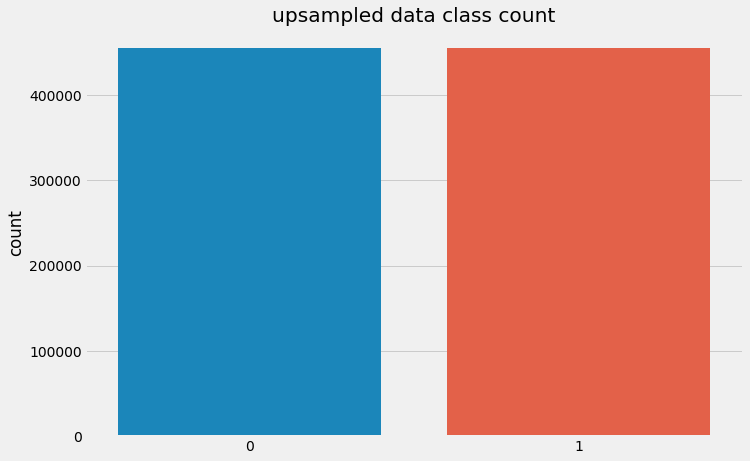

In [0]:
#sns.barplot(y=pd.DataFrame(y).isFraud.value_counts(),x=[0,1])
#plt.title('upsampled data class count')
#plt.ylabel('count')

In [0]:
# split validation data to optimize classifier during training
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3,random_state=42)
del X, y

In [0]:
logger.info(f'X_train shape: {X_train.shape}')
logger.info(f'y_train shape: {y_train.shape}')
logger.info(f'X_val shape: {X_val.shape}')
logger.info(f'y_val shape: {y_val.shape}')

X_train shape: (330702, 205)
y_train shape: (330702,)
X_val shape: (141730, 205)
y_val shape: (141730,)


In [0]:
# coding variables
input_size = X_train.shape[1]
output_size = 2
# modeling programming variables
# perform model creation and validation techniques
modelsPerformance = {'ModelName':[], 
                     'TestAccuracyScore':[],
                     'PredictAccuracyScore':[] ,
                     'TrainTime':[], 
                     'TestTime':[],
                     'ScoreTime':[], 
                     'PredictTime':[]
                     }
class_to_label = {0:'Fraud',1:'Not Fraud'}
# labels used for plotting
labels = [l for l in class_to_label.keys()]

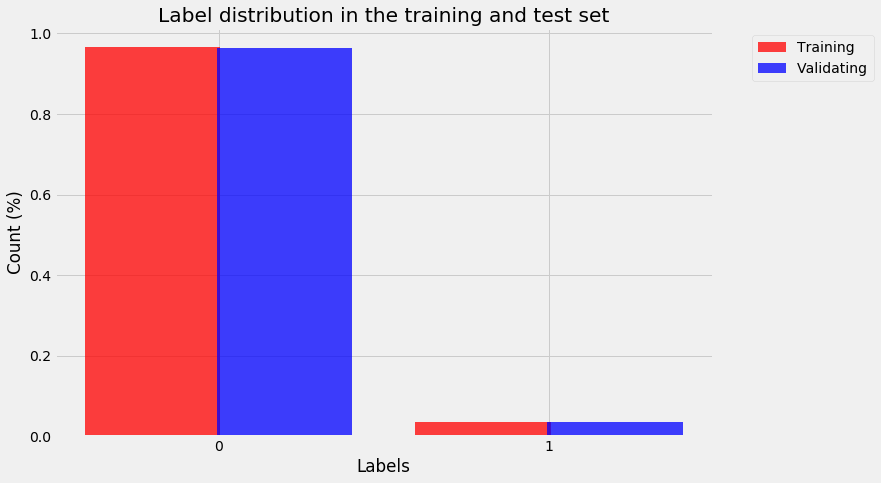

In [0]:
# number of label classes, 0 - 1
num_classes = 2

# look for imbalance in the sample observations for the class
training_counts = [None] * num_classes
validation_counts = [None] * num_classes

for i in range(num_classes):
    training_counts[i] = len(y_train[y_train == i])/len(y_train)
    validation_counts[i] = len(y_val[y_val == i])/len(y_val)

# plot histogram of the data
train_bar = plt.bar(np.arange(num_classes)-0.2, training_counts, align='center', color = 'r', alpha=0.75, width = 0.41, label='Training')
validate_bar = plt.bar(np.arange(num_classes)+0.2, validation_counts, align='center', color = 'b', alpha=0.75, width = 0.41, label = 'Validating')

plt.xlabel('Labels')
plt.xticks((0,1))
plt.ylabel('Count (%)')
plt.title('Label distribution in the training and test set')
plt.legend(bbox_to_anchor=(1.05, 1), handles=[train_bar, validate_bar], loc=2)
plt.grid(True)
plt.show()

In [0]:
# one hot encoding
#lbe = LabelEncoder()
#y_train = lbe.fit_transform(y_train)
#y_val = lbe.fit_transform(y_val)

In [0]:
# one hot encoding - convert class vectores to binary class matrices
# This means that a column will be created for each output category 
#  and a binary variable is inputted for each category.

y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)
y_val = np_utils.to_categorical(y_val, 2)

In [0]:
logger.info(f'X_train shape: {X_train.shape}')
logger.info(f'y_train shape: {y_train.shape}')
print('')
logger.info(f'X_test shape: {X_test.shape}')
logger.info(f'y_test shape: {y_test.shape}')
print('')
logger.info(f'X_val shape: {X_val.shape}')
logger.info(f'y_val shape: {y_val.shape}')

X_train shape: (330702, 205)
y_train shape: (330702, 2)
X_test shape: (118108, 205)
y_test shape: (118108, 2)
X_val shape: (141730, 205)
y_val shape: (141730, 2)


Build a model consisting of multiple dense layers...  

We will use the Keras [sequential API](https://keras.io/models/sequential/).  

Then we directly add the hidden layers to the model using `model.add()`.
For each `Dense()` layer, you can specify its name, the number of units, its activation function, etc.  

Input layer - Keras takes a simple approach and defines it together with the first hidden layer via the parameter `input_dim` or `input_shape`.  

In [0]:
# Model - Build the baseline
def baseline_model():
    # create model
    model = Sequential()
    
    model.add(Dense(input_size, input_dim=input_size, kernel_initializer='normal', activation='relu'))
    model.add(Dense(output_size, kernel_initializer='normal', activation='softmax'))
    #model.add(Dense(name='FullyConnected_0', units=300, input_dim=input_size, activation='relu'))
    #model.add(Dense(name='FullyConnected_1', units=200, activation='relu'))
    #model.add(Dense(name='FullyConnected_2', units=111, activation='relu'))
    #model.add(Dense(name='FullyConnected_OutputLayer', units=output_size, activation='softmax'))
    
    # Compile model loss - categorical_crossentropy - used for identifing multiple images
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [0]:
nn_base = baseline_model()
logger.info(nn_base.summary())
logger.info(nn_base.count_params())

None
42642


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 205)               42230     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 412       
Total params: 42,642
Trainable params: 42,642
Non-trainable params: 0
_________________________________________________________________


In [0]:
# create baseline model
epochs=300
batch_size=1000
verbose=1
t = 0.0
#nn_base = baseline_model()
with auq.elapsed_timer() as elapsed:
    
    # fit the model
    nn_base_hist = nn_base.fit(X_train, y_train, validation_data=(X_val, y_val), shuffle=True,
                                         epochs=epochs, batch_size=batch_size, verbose=verbose) 

    t = elapsed()
    logger.info(f'Base NN Build model time: [{t}]')

    #save model to file
    with open(f'{modelDir}{modelName}.pkl','wb') as f:
        pickle.dump(nn_base,f)

    with open(f'{modelDir}{modelName}_hist.pkl','wb') as f:
        pickle.dump(nn_base_hist,f)

    # save neurl network to file
    from pathlib import Path
    modelFileName = f'{modelName}.json'
    model_structure = nn_base.to_json()
    f = Path(f'{modelDir}{modelFileName}')
    f.write_text(model_structure)

    # save neural network trained weights
    modelFileH5 = f'{modelName}.h5'
    nn_base.save_weights(f'{modelDir}{modelFileH5}')

    # keep track of each model's performance metrics
    modelsPerformance['ModelName'].append(f'{modelName}')
    modelsPerformance['TrainTime'].append(t)

Train on 330702 samples, validate on 141730 samples
Epoch 1/300
330702/330702 [==============================] - 9s 28us/step - loss: 0.1702 - acc: 0.9675 - val_loss: 0.1407 - val_acc: 0.9696
Epoch 2/300
330702/330702 [==============================] - 5s 15us/step - loss: 0.1379 - acc: 0.9699 - val_loss: 0.1314 - val_acc: 0.9708
Epoch 3/300
330702/330702 [==============================] - 5s 15us/step - loss: 0.1224 - acc: 0.9709 - val_loss: 0.1204 - val_acc: 0.9709
Epoch 4/300
330702/330702 [==============================] - 5s 15us/step - loss: 0.1260 - acc: 0.9710 - val_loss: 0.1354 - val_acc: 0.9698
Epoch 5/300
330702/330702 [==============================] - 5s 15us/step - loss: 0.1235 - acc: 0.9713 - val_loss: 0.1262 - val_acc: 0.9716
Epoch 6/300
330702/330702 [==============================] - 5s 16us/step - loss: 0.1193 - acc: 0.9715 - val_loss: 0.1406 - val_acc: 0.9684
Epoch 7/300
330702/330702 [==============================] - 5s 15us/step - loss: 0.1147 - acc: 0.9718 - val

Base NN Build model time: [1303.2266371540004]


## Model Score

In [0]:
# reading model in from file and plotting
import pickle

with open(f'{modelDir}{modelName}.pkl','rb') as f:
    nn_base = pickle.load(f)
    
with open(f'{modelDir}{modelName}_hist.pkl','rb') as f:
    nn_base_hist = pickle.load(f)

In [0]:
t = 0.0
with auq.elapsed_timer() as elapsed:
    
    nn_base_scores = nn_base.evaluate(X_test, y_test, verbose=0)
    t = elapsed()
    test_loss = nn_base_scores[0]
    test_accuracy = nn_base_scores[1]
    logger.info(f'Test loss: {test_loss}')
    logger.info(f'Test accuracy: {test_accuracy}')
    logger.info(f'Baseline Error: {(100-nn_base_scores[1]*100)}')

modelsPerformance['ScoreTime'].append(t)
modelsPerformance['TestAccuracyScore'].append(test_accuracy)

Test loss: 0.0959736775085113
Test accuracy: 0.9773089037192809
Baseline Error: 2.2691096280719023


In [0]:
nn_base_scores

[0.0959736775085113, 0.9773089037192809]

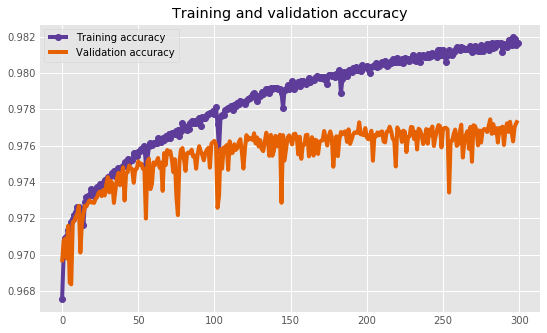

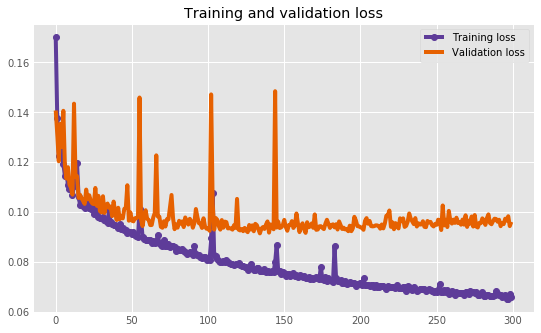

In [0]:
# plot training and validation accuracy
auq.plot_nn_training_curve(nn_base_hist,f'{imageDir}nn_base_training_validation_accuracy')

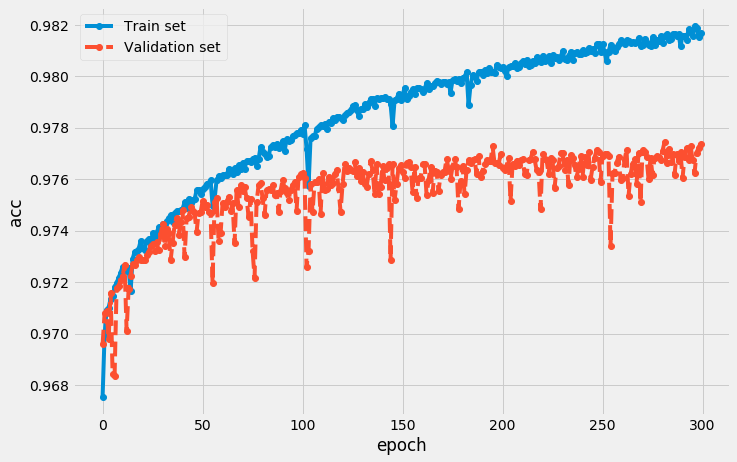

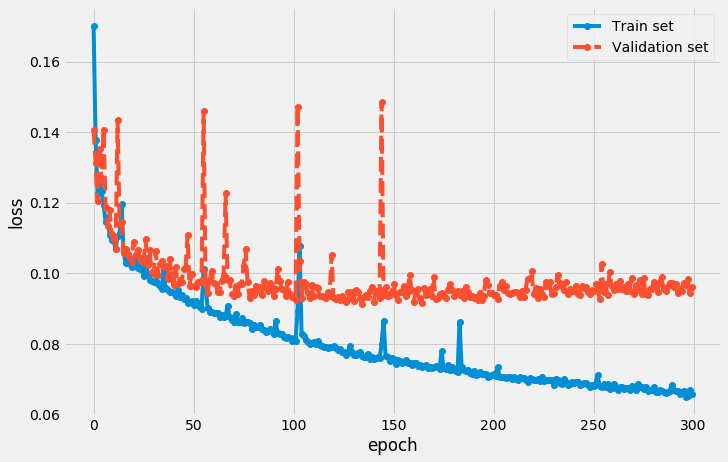

In [0]:
hist = sorted(nn_base_hist.history.items(), key=lambda x: (x[0].replace('val_', ''), x[0]))
for metric, values in groupby(hist, key=lambda x: x[0].replace('val_', '')):
    val0, val1 = list(values)
    plt.plot(nn_base_hist.epoch, val0[1], nn_base_hist.epoch, val1[1], '--', marker='o')
    plt.xlabel('epoch'), plt.ylabel(val0[0]), plt.legend(('Train set', 'Validation set'))
    plt.show()

## Model Predict

In [0]:
# have to convert the y_test back to non hot encoded format
logger.info(f'y_test.shape: {y_test.shape}')

y_test_classes = np.argmax(y_test, axis=1)
logger.info(f'y_test_classes.shape: {y_test_classes.shape}')

#y_test_classes.std()

y_test.shape: (118108, 2)
y_test_classes.shape: (118108,)


In [0]:
t = 0.0
with auq.elapsed_timer() as elapsed:
    y_test_pred = nn_base.predict_classes(X_test)

modelsPerformance['PredictTime'].append(t)

correct = np.nonzero(y_test_pred==y_test_classes)[0]
incorrect = np.nonzero(y_test_pred!=y_test_classes)[0]

In [0]:
targetNames = ["Class{}".format(i) for i in range(num_classes)]
logger.info(f'\n{classification_report(y_test_classes, y_test_pred, target_names=targetNames)}')   



              precision    recall  f1-score   support

      Class0       0.98      1.00      0.99    113972
      Class1       0.81      0.46      0.59      4136

    accuracy                           0.98    118108
   macro avg       0.90      0.73      0.79    118108
weighted avg       0.97      0.98      0.97    118108



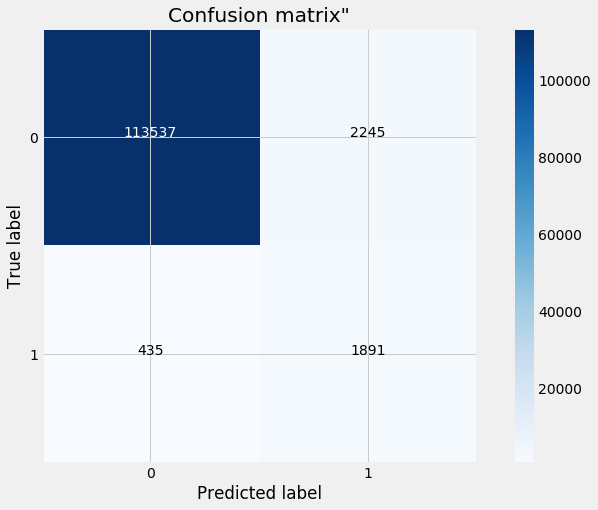

In [0]:
# confusion matrix evaluation
# Test Prediction Accuracy
base_test_pred_table = pd.DataFrame({'True_Test_Labels':y_test_pred, 'Predicted_Test_Labels':y_test_classes})
cm = confusion_matrix(base_test_pred_table.iloc[:,0],base_test_pred_table.iloc[:,1], labels=[0,1])
auq.plot_confusion_matrix(cm, [0,1], f'{imageDir}nn_base_confusion_matrix.png')

In [0]:
# error percentage per class
#comparison = sorted(zip(y_test_classes, y_test_pred, y_test_pred == y_test_classes), key=lambda x: x[0])
#for c, v in groupby(comparison, key=lambda x: x[0]):
    #v = [x[2] for x in v]
    #plt.barh(c,  (1 - sum(v) / len(v)) * 100)
#plt.xlabel('Miss-classification %'), plt.ylabel('True class')
#plt.yticks(list({x[0] for x in comparison}));

In [0]:
## What is comparison - what is g_data

#Relation between true classes and predicted classes for miss-classifications
#for label in range(2):
#    miss = filter(lambda x: not x[2] and x[1] == label, comparison)
#    for (y_test_classes, y_test_pred), g_data in groupby(miss, key=lambda x: (x[0], x[1])):
#        plt.barh(y_test_classes, sum(1 for _ in g_data), color='skyblue')
#    plt.title(f'True class: "{label}"')
#    plt.xlabel('Number of predictions'), plt.ylabel('Predicted class')
#    plt.yticks(list({x[0] for x in comparison})), plt.show()